# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from getpass import getpass

# Import API key
weather_api_key = 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

city_data = []

print("Beginning retrival...")
record_count = 1
set_count = 1
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    city_url = url + "&q=" + city
    print(f"City {city}, Set {set_count}, Count{record_count}")
    record_count += 1
    try:
        response = requests.get(city_url).json()
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]
        city_data.append({"City": city, 
                          "Lat": lat, 
                          "Lng": lon, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date})
    except:
        print("Not found... Next City")
        pass
              
print("Data Retrieval Complete      ")

        

Beginning retrival...
City busselton, Set 1, Count1
City tuktoyaktuk, Set 1, Count2
City mys shmidta, Set 1, Count3
Not found... Next City
City port alfred, Set 1, Count4
City penzance, Set 1, Count5
City qaanaaq, Set 1, Count6
City bolu, Set 1, Count7
City kaitangata, Set 1, Count8
City chihuahua, Set 1, Count9
City hobart, Set 1, Count10
City upernavik, Set 1, Count11
City khatanga, Set 1, Count12
City avera, Set 1, Count13
City bengkulu, Set 1, Count14
City avarua, Set 1, Count15
City rikitea, Set 1, Count16
City pagudpud, Set 1, Count17
City ovalle, Set 1, Count18
City longyearbyen, Set 1, Count19
City kemijarvi, Set 1, Count20
City albany, Set 1, Count21
City luganville, Set 1, Count22
City amderma, Set 1, Count23
Not found... Next City
City belushya guba, Set 1, Count24
Not found... Next City
City port shepstone, Set 1, Count25
City vitim, Set 1, Count26
City isangel, Set 1, Count27
City bethel, Set 1, Count28
City ugoofaaru, Set 1, Count29
City port blair, Set 1, Count30
City ja

City omboue, Set 6, Count4
City urumqi, Set 6, Count5
City lata, Set 6, Count6
City pathein, Set 6, Count7
City pitimbu, Set 6, Count8
City batagay-alyta, Set 6, Count9
City shimoda, Set 6, Count10
City plouzane, Set 6, Count11
City mahadday weyne, Set 6, Count12
Not found... Next City
City luderitz, Set 6, Count13
City redmond, Set 6, Count14
City marawi, Set 6, Count15
City sisimiut, Set 6, Count16
City ostrovnoy, Set 6, Count17
City cairns, Set 6, Count18
City hirara, Set 6, Count19
City guaira, Set 6, Count20
City quelimane, Set 6, Count21
City faanui, Set 6, Count22
City pinawa, Set 6, Count23
City ziguinchor, Set 6, Count24
City saldanha, Set 6, Count25
City ushtobe, Set 6, Count26
City parana, Set 6, Count27
City champerico, Set 6, Count28
City sistranda, Set 6, Count29
City araouane, Set 6, Count30
City larsnes, Set 6, Count31
City peniche, Set 6, Count32
City iracoubo, Set 6, Count33
City harbour breton, Set 6, Count34
City bathsheba, Set 6, Count35
City puerto penasco, Set 6,

City utiroa, Set 11, Count9
Not found... Next City
City ocos, Set 11, Count10
City bolungarvik, Set 11, Count11
Not found... Next City
City teacapan, Set 11, Count12
City gat, Set 11, Count13
City aiken, Set 11, Count14
City kvitok, Set 11, Count15
City asyut, Set 11, Count16
City qasigiannguit, Set 11, Count17
City turtas, Set 11, Count18
City olafsvik, Set 11, Count19
City nileshwar, Set 11, Count20
City lubartow, Set 11, Count21
City tidore, Set 11, Count22
Not found... Next City
City maceio, Set 11, Count23
City awjilah, Set 11, Count24
City kotovo, Set 11, Count25
City deputatskiy, Set 11, Count26
City tineo, Set 11, Count27
City kaa-khem, Set 11, Count28
City tirthahalli, Set 11, Count29
City fare, Set 11, Count30
City olinda, Set 11, Count31
City raahe, Set 11, Count32
City pemba, Set 11, Count33
City kalmunai, Set 11, Count34
City aripuana, Set 11, Count35
City mangrol, Set 11, Count36
City shasta lake, Set 11, Count37
City puerto madero, Set 11, Count38
City san rafael, Set 11

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df = pd.DataFrame(city_data)
df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.65,115.33,50.00,72,8,6.62,AU,1591121565
1,tuktoyaktuk,69.45,-133.04,37.40,74,20,11.41,CA,1591121583
2,port alfred,-33.59,26.89,61.00,86,90,4.97,ZA,1591121582
3,penzance,50.12,-5.54,68.00,56,4,9.17,GB,1591121836
4,qaanaaq,77.48,-69.36,29.26,92,94,1.63,GL,1591121988
5,bolu,40.67,31.58,49.42,85,97,1.86,TR,1591121880
6,kaitangata,-46.28,169.85,51.01,70,55,3.00,NZ,1591121988
7,chihuahua,28.50,-106.00,86.00,28,20,5.82,MX,1591121989
8,hobart,-42.88,147.33,48.20,61,75,14.99,AU,1591121954
9,upernavik,72.79,-56.15,30.90,96,100,6.76,GL,1591121989


In [7]:
df.to_csv('city_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

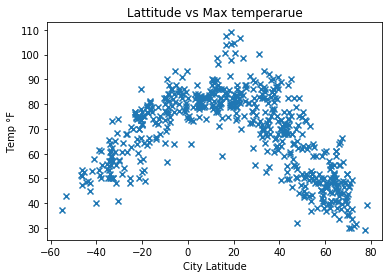

In [9]:
plt.scatter(df['Lat'], df['Max Temp'], marker='x')
plt.title('Lattitude vs Max temperarue')
plt.ylabel('Temp °F')
plt.xlabel('City Latitude')
plt.grid = True

plt.savefig('Lat_vs_Temp.png')
plt.show()



#### Latitude vs. Humidity Plot

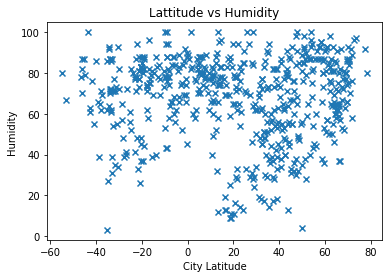

In [10]:
plt.scatter(df['Lat'], df['Humidity'], marker='x')
plt.title('Lattitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('City Latitude')
plt.grid = True

plt.savefig('Lat_vs_Hum.png')
plt.show()



#### Latitude vs. Cloudiness Plot

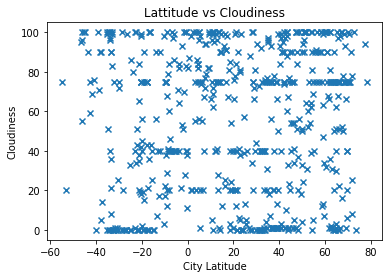

In [11]:
plt.scatter(df['Lat'], df['Cloudiness'], marker='x')
plt.title('Lattitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('City Latitude')
plt.grid = True

plt.savefig('Lat_vs_Cloud.png')
plt.show()



#### Latitude vs. Wind Speed Plot

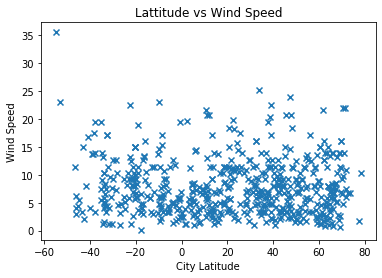

In [12]:
plt.scatter(df['Lat'], df['Wind Speed'], marker='x')
plt.title('Lattitude vs Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('City Latitude')
plt.grid = True

plt.savefig('Lat_vs_Wind.png')
plt.show()



## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression